# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import csv
import os

import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

#output_data_file 
lat_range = (-90, 90)
lng_range = (-180, 180)



33333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++6666666666666666666666666666666s### = os.path.join("output_data/cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

units = "metric"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid=a2aa206508b3461ad6e19c80f915325e&units={units}&q="

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)


621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:

lat = []
lng = []
temp = []
hum = []
cloud = []
wind = []
country = []
date = []
weather_dicts = []



#cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]
# Loop through the list of cities and perform a request for data on each
count = 0

output_path = os.path.join("weather.csv")         
with open(output_path, 'w') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerow(['city', 'lat', 'lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date'])  
    for city in cities:
        try:
            response = requests.get(query_url + city).json()
               # dic
               # lat.append(response['coord']['lat'])
               # lng.append(response['coord']['lng'])
               # temp.append(response['main']['temp_max'])
               # hum.append(response['main']['humidity'])
               # wind.append(response['wind']['speed'])
               # country.append(response['wind']['speed'])
               # date.append(response['dt'])
            count = count + 1
            weather_dict = {
                       "city": city,
                       "lat": response['coord']['lat'],
                       "lng": response['coord']['lon'], 
                       "Max Temp": response['main']['temp_max'],
                       "Humidity": response['main']['humidity'],
                       "Cloudiness": response['clouds']['all'],
                       "Wind Speed":response['wind']['speed'],
                       "Country": response['sys']['country'],
                       "Date": response['dt'],
                       "ID": response['id']
    
                }
            
            csvwriter.writerow([ city, weather_dict['lat'], weather_dict['lng'], weather_dict['Max Temp'], weather_dict['Humidity'], weather_dict['Cloudiness'], weather_dict['Wind Speed'], weather_dict['Country'], weather_dict['Date']])
            weather_dicts.append(weather_dict)
            count = count + 1
            print(city, weather_dict[ID])
        except:
                ncount= 0
 
           
    
        
#print(count)


In [49]:
weather_data = pd.DataFrame(weather_dicts)
weather_data.count()

city          582
lat           582
lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [39]:

weather_data.head(20)



""


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [50]:
sorted_df = weather_data.sort_values("Humidity",ascending = False)
sorted_df

,city,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
447,osorno,-40.57,-73.15,3.00,100,90,1.50,CL,1598183177
557,mayo,38.89,-76.51,24.44,100,20,2.07,US,1598183190
418,banjar,-8.19,114.97,27.00,100,20,4.60,ID,1598183174
73,nishihara,26.18,127.76,26.67,100,75,8.20,JP,1598183124
435,flin flon,54.77,-101.86,14.00,100,90,2.60,CA,1598183176
...,...,...,...,...,...,...,...,...,...
420,yaypan,40.38,70.82,38.97,9,0,1.22,UZ,1598183174
367,mirabad,30.44,61.84,44.60,9,0,2.85,AF,1598183168
404,atar,20.52,-13.05,43.55,8,19,3.22,MR,1598183172
282,ngunguru,-35.62,174.50,12.22,3,53,7.15,NZ,1598183153


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [51]:
# Extract relevant fields from the data frame


# Exwith open(output_path, 'w') as csvfile:

    # Initialize csv.writer
weather_data_csv = os.path.join("output_data_file.csv")

with open(weather_data_csv, 'w', newline='') as csvfile:
    csvwriter = csv.writer(output_data_file,'w', delimiter=',')
    weather_data.to_csv(index=False)
    

TypeError: argument 1 must have a "write" method

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

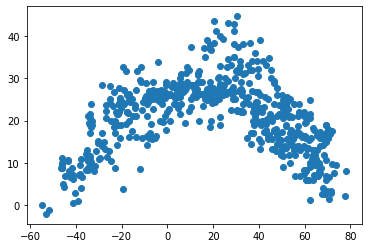

In [52]:
# Plot the world average as a line chart
#TS, = plt.scatter(Stats_df.index(),Stats_df["TS%"])
# Plot the unemployment values for a single country
#Draft Pick, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014"]], 
                        #color="green",label=combined_unemployed_data.loc['USA',"Country Name"])
    
# Create a legend for our chart
#plt.legend(handles=[world_avg, country_one], loc="best")
#sorted_df.reset_index().plot.scatter(x = 'Latitude', y = 'Max Temp')
x_values = weather_data["lat"]
y_values = weather_data["Max Temp"]

plt.scatter(x_values,y_values)

plt.show()
#Points, = plt.plot(Stats_df["Average points Scored"])
#plt.show()
#plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            #s=x_axis, alpha=0.75)

## Latitude vs. Humidity Plot

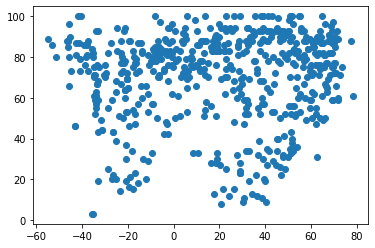

In [53]:
# Plot the world average as a line chart
#TS, = plt.scatter(Stats_df.index(),Stats_df["TS%"])
# Plot the unemployment values for a single country
#Draft Pick, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014"]], 
                        #color="green",label=combined_unemployed_data.loc['USA',"Country Name"])
    
# Create a legend for our chart
#plt.legend(handles=[world_avg, country_one], loc="best")
#sorted_df.reset_index().plot.scatter(x = 'Latitude', y = 'Max Temp')
x_values = weather_data["lat"]
y_values = weather_data["Humidity"]

plt.scatter(x_values,y_values)

plt.show()
#Points, = plt.plot(Stats_df["Average points Scored"])
#plt.show()
#plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            #s=x_axis, alpha=0.75)

## Latitude vs. Cloudiness Plot

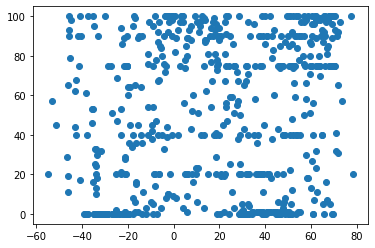

In [54]:
# Plot the world average as a line chart
#TS, = plt.scatter(Stats_df.index(),Stats_df["TS%"])
# Plot the unemployment values for a single country
#Draft Pick, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014"]], 
                        #color="green",label=combined_unemployed_data.loc['USA',"Country Name"])
    
# Create a legend for our chart
#plt.legend(handles=[world_avg, country_one], loc="best")
#sorted_df.reset_index().plot.scatter(x = 'Latitude', y = 'Max Temp')
x_values = weather_data["lat"]
y_values = weather_data["Cloudiness"]

plt.scatter(x_values,y_values)

plt.show()
#Points, = plt.plot(Stats_df["Average points Scored"])
#plt.show()
#plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            #s=x_axis, alpha=0.75)

## Latitude vs. Wind Speed Plot

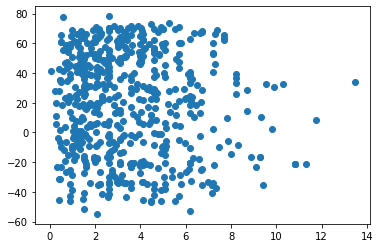

In [55]:
# Plot the world average as a line chart
#TS, = plt.scatter(Stats_df.index(),Stats_df["TS%"])
# Plot the unemployment values for a single country
#Draft Pick, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014"]], 
                        #color="green",label=combined_unemployed_data.loc['USA',"Country Name"])
    
# Create a legend for our chart
#plt.legend(handles=[world_avg, country_one], loc="best")
#sorted_df.reset_index().plot.scatter(x = 'Latitude', y = 'Max Temp')
x_values = weather_data["Wind Speed"]
y_values = weather_data["lat"]

plt.scatter(x_values,y_values)

plt.show()
#Points, = plt.plot(Stats_df["Average points Scored"])
#plt.show()
#plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            #s=x_axis, alpha=0.75)

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4926171492772154


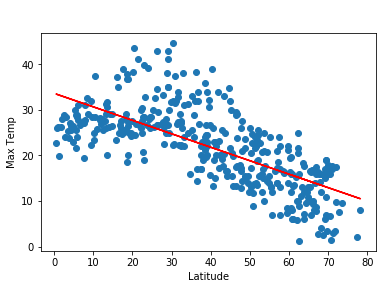

In [91]:
#lat_df = weather_data.set_index("lat")
northern = []
southern = []
#drop_value_1 = northern_df.index.min()
for index, row in weather_data.iterrows():
    if(row['lat']>0):
        northern_dict = {
                       "lat": row['lat'],
                       "Max Temp": row['Max Temp'],
                       "Humidity": row['Humidity'],
                       "Cloudiness": row['Cloudiness'],
                       "Wind Speed": row['Wind Speed']
                }
        northern.append(northern_dict)
    if(row['lat']<0):
        southern_dict = {
                       "lat": row['lat'],
                       "Max Temp": row['Max Temp'],
                       "Humidity": row['Humidity'],
                       "Cloudiness": row['Cloudiness'],
                       "Wind Speed": row['Wind Speed']
                       
                }
        southern.append(southern_dict)
northern_df = pd.DataFrame(northern)
southern_df = pd.DataFrame(southern)
x_values = northern_df["lat"]
y_values = northern_df["Max Temp"]
#northern.plot(northern.index, northern["Max Temp"],ax=ax, kind='scatter')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()
#plot = northern_df.plot.scatter(x= northern_df.index(), y='Max Temp', figsize=(5, 5))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5653069722051091


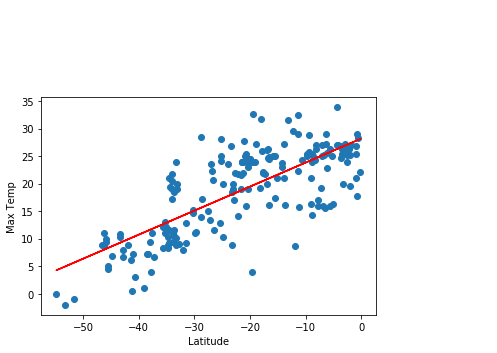

In [90]:
#northern = weather_data.set_index("lat")
x_values = southern_df["lat"]
y_values = southern_df["Humidity"]
#northern.plot(northern.index, northern["Max Temp"],ax=ax, kind='scatter')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0017922271261583875


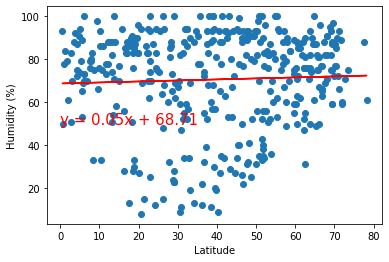

In [93]:
#northern = weather_data.set_index("lat")
x_values = northern_df["lat"]
y_values = northern_df["Humidity"]
#northern.plot(northern.index, northern["Max Temp"],ax=ax, kind='scatter')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


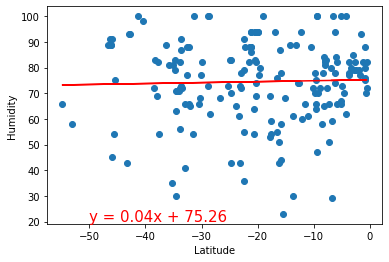

In [19]:
#northern = weather_data.set_index("lat")
x_values = southern_df["lat"]
y_values = southern_df["Humidity"]
#northern.plot(northern.index, northern["Max Temp"],ax=ax, kind='scatter')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005711820026556794


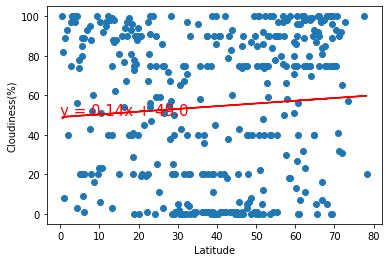

In [96]:
#northern = weather_data.set_index("lat")
x_values = northern_df["lat"]
y_values = northern_df["Cloudiness"]
#northern.plot(northern.index, northern["Max Temp"],ax=ax, kind='scatter')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03264551983409501


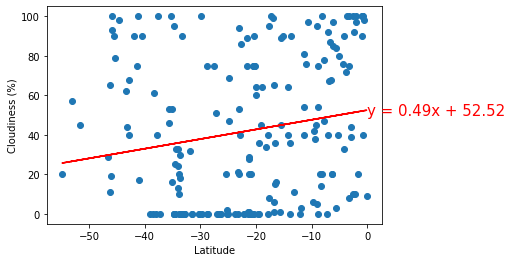

In [97]:
#northern = weather_data.set_index("lat")
x_values = southern_df["lat"]
y_values = southern_df["Cloudiness"]
#northern.plot(northern.index, northern["Max Temp"],ax=ax, kind='scatter')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.000821455567274554


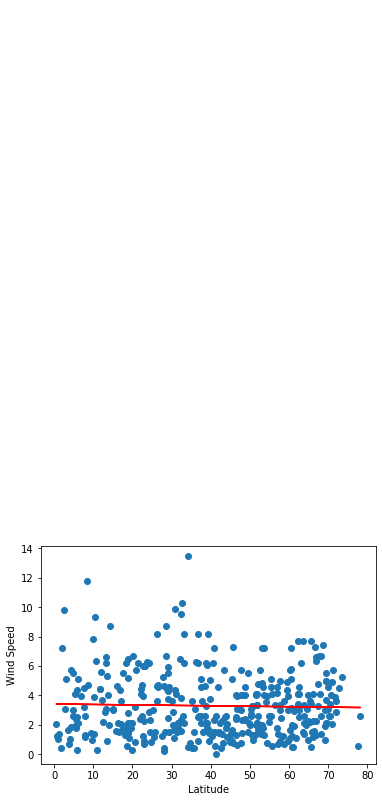

In [99]:
#northern = weather_data.set_index("lat")
x_values = northern_df["lat"]
y_values = northern_df["Wind Speed"]
#northern.plot(northern.index, northern["Max Temp"],ax=ax, kind='scatter')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.011838655252134771


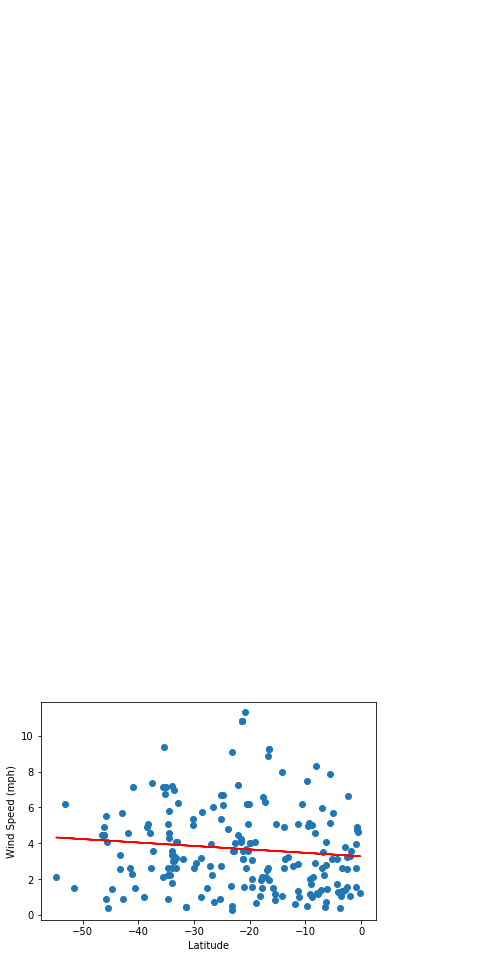

In [102]:
#northern = weather_data.set_index("lat")
x_values = southern_df["lat"]
y_values = southern_df["Wind Speed"]
#northern.plot(northern.index, northern["Max Temp"],ax=ax, kind='scatter')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()